In [13]:
# tide data

In [14]:
import numpy as np


In [15]:
infile = open("NVT_WATHTE_HARL.csv")

In [16]:
infile

<_io.TextIOWrapper name='NVT_WATHTE_HARL.csv' mode='r' encoding='UTF-8'>

In [46]:
import csv
from datetime import datetime

def read_data(filename):
    """
    read the data from the gezeiten-kalender.de site and return it as two lists:

    datetimes of the data
    measured tidal heights
    
    hint: to convert text to datetimes:
          times.append(datetime.strptime(dt_str, "%d-%m-%Y %H:%M:%S"))
    """

    # first we need to open the file

    # using "with" ensures that the file will be properly closed
    # when we are done with it.
    times = []
    heights = []
    with open(filename) as infile:
        # skip the first row
        infile.readline()
        for row in csv.reader(infile, delimiter=";"):
            try:
                h = float(row[4])
            except ValueError:
                continue
            dt_str = row[0] + " " + row[1]
            # print(dt_str)
            # dt_str = "21-9-2018 13:50:00"
            dt = datetime.strptime(dt_str, "%d-%m-%Y %H:%M:%S")
            # print(h)
            heights.append(h)
            times.append(dt)
    heights = np.array(heights)
    return times, heights

In [47]:
t, h = read_data("NVT_WATHTE_HARL.csv")
import read_tide_data
t_pred, h_pred = read_tide_data.read_data("GezeitenkalenderHarlingen.csv")

h_pred = np.array(h_pred)
h = np.array(h)

# convert to cm
h_pred *= 100


In [48]:
pred_mean = h_pred.mean()
meas_mean = h.mean()

h_pred_2 = h_pred - pred_mean
h_2 = h - meas_mean

print(h_pred_2.mean())
print(h_2.mean())

print(pred_mean)
print(meas_mean)


h_2.shape

9.634477773018308e-16
-2.261861979042348e-15
121.2457627118644
16.00547127580204


(4021,)

In [49]:
import matplotlib.pyplot as plt
%matplotlib inline



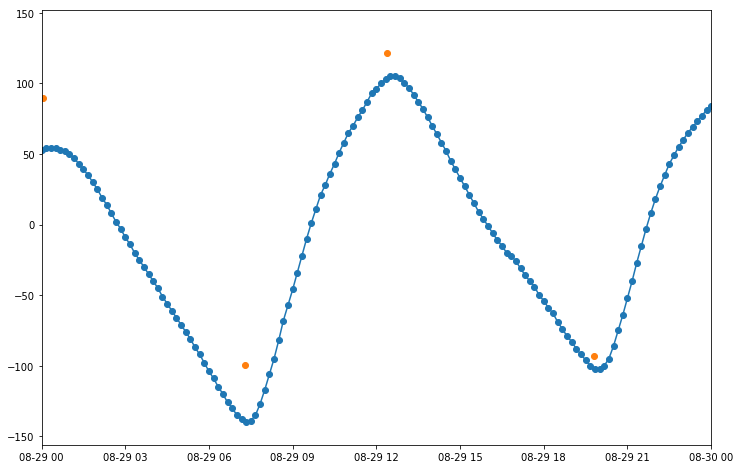

In [62]:
fig, ax = plt.subplots()
fig.set_size_inches(12, 8)

start = t[0]
end = t[-1]

start = datetime(2018, 8, 29) 
end = datetime(2018, 8, 30)
ax.set_xlim((start, end))
ax.plot(t, h_2, '-o', t_pred, h_pred_2, 'o')
# ax.legend?



In [22]:

dt_str = "21-9-2018 13:50:00"
datetime.strptime(dt_str, "%d-%m-%Y %H:%M:%S")


datetime.datetime(2018, 9, 21, 13, 50)

In [23]:
datetime(2018, 9, 3, minute=30)


datetime.datetime(2018, 9, 3, 0, 30)